In [170]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (17,8)
import seaborn as sns


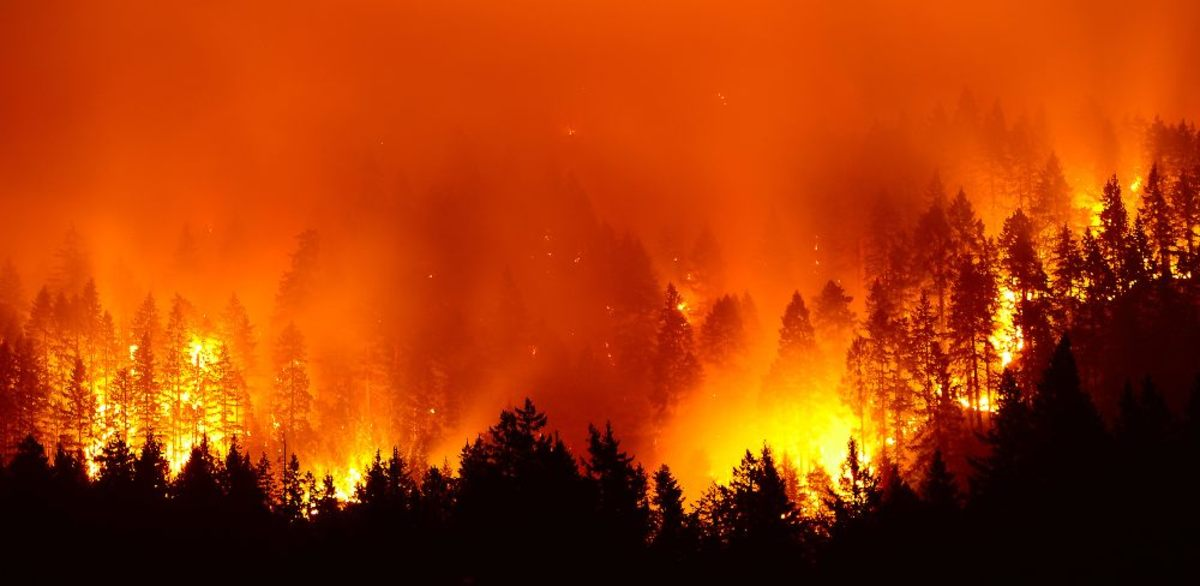

In [197]:
Image('rainforest_fires.jpg')

In [171]:
df= pd.read_csv('forest_fires_amazon.csv' ,  encoding="cp1252") 

In [172]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [173]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [174]:
df.replace({'Janeiro':'january','Fevereiro':'feburary','Março':'march','Abril':'april','Maio':'may','Junho':'june','Julho':'july','Agosto':'august','Setembro':'september','Outubro':'october','Novembro':'november','Dezembro':'december'},inplace=True)
df.head()

,year,state,month,number,date
0,1998,Acre,january,0.0,1998-01-01
1,1999,Acre,january,0.0,1999-01-01
2,2000,Acre,january,0.0,2000-01-01
3,2001,Acre,january,0.0,2001-01-01
4,2002,Acre,january,0.0,2002-01-01


In [184]:
df_new = pd.DataFrame(df.groupby(['state'])['number'].sum())
df_new.reset_index(inplace=True)
df_new.head()

,state,number
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226


Text(0.5, 0, 'state')

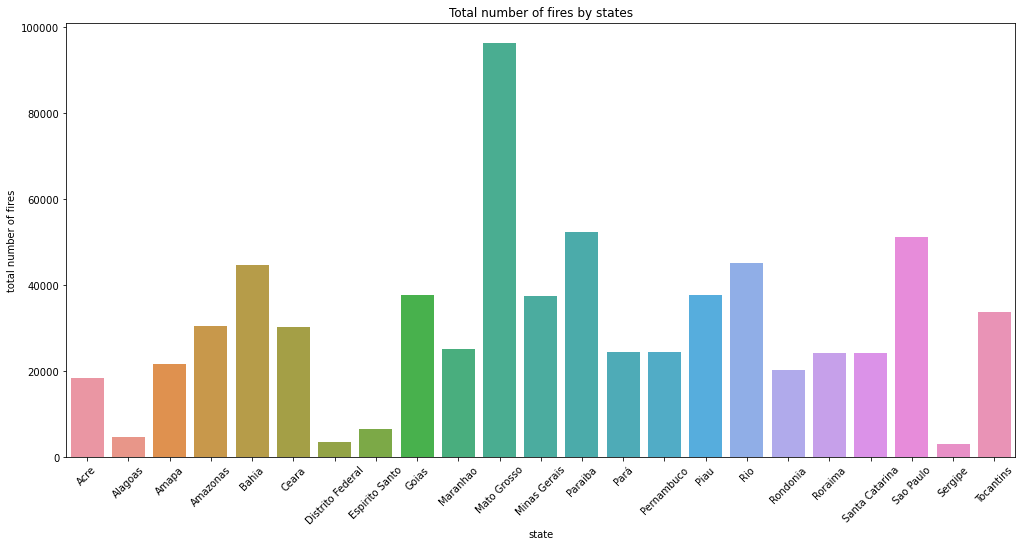

In [190]:
chart =sns.barplot(x ='state', y= 'number' , data = df_new)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Total number of fires by states')
plt.ylabel('total number of fires')
plt.xlabel('state')

In [194]:
month = pd.DataFrame(df.groupby(['month'])['number'].sum())
month.reset_index(inplace=True)
month.head()

,month,number
0,april,28188.770
1,august,88050.435
2,december,57535.480
3,feburary,30848.050
4,january,47747.844


Text(0.5, 0, 'month')

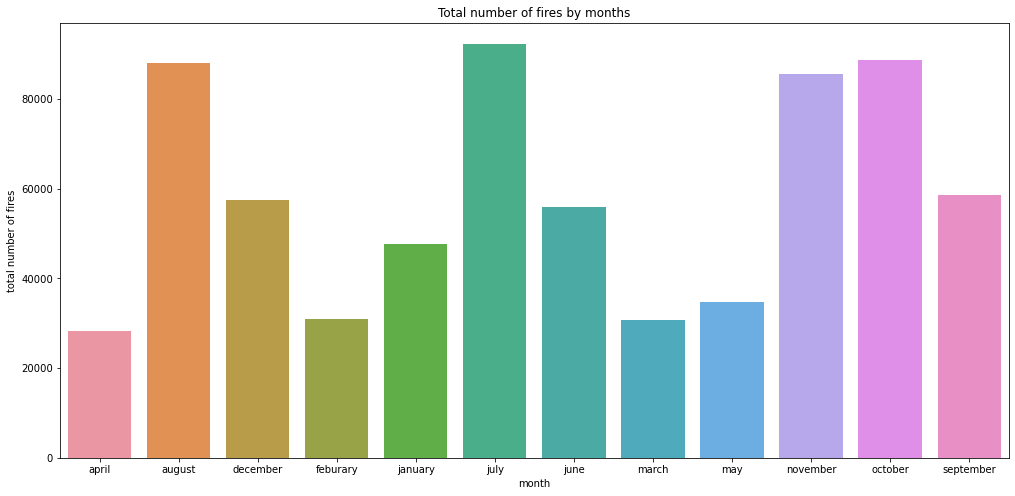

In [196]:
sns.barplot(x ='month', y= 'number' , data = month)
plt.title('Total number of fires by months')
plt.ylabel('total number of fires')
plt.xlabel('month')

In [203]:
data_pivot = df.pivot_table(values='number', index='year', columns='month', aggfunc=np.sum)
data_pivot = data_pivot.loc[:,['january', 'feburary', 'march', 'april', 'may', 'june', 'july', 'august','september', 'october', 'november', 'december']]

Text(0.5, 60.0, 'month')

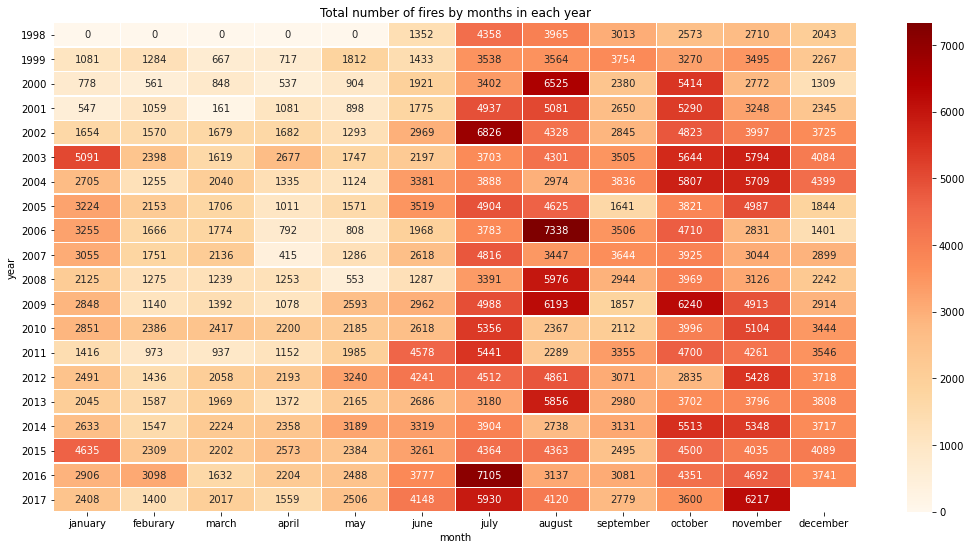

In [219]:
plt.rcParams['figure.figsize'] = (18,9)
sns.heatmap(data_pivot, cmap='OrRd', fmt="1.0f", annot=True, linewidths=0.5)
plt.title('Total number of fires by months in each year')
plt.ylabel('year')
plt.xlabel('month')


In [148]:
df3=pd.DataFrame(df.groupby(['state','year'])['number'].sum())

In [169]:
df_values, df_ranks = bcr.prepare_long_data(df3, index='year', columns='state',
                                            values='number', steps_per_period=1,
                                            orientation='h', sort='desc')

def period_summary(values, ranks):
    top2 = values.nlargest(2)
    leader = top2.index[0]
    lead = top2.iloc[0] - top2.iloc[1]
    s = f'{leader} by {lead:.0f}'
    return {'s': s, 'x': .95, 'y': .07, 'ha': 'right', 'size': 8}

bcr.bar_chart_race(df_values, period_length=1000,
                   fixed_max=True, fixed_order=True, n_bars=10,
                   figsize=(5, 3), period_fmt='year {x:,.0f}',
                   title='Forest Fires in Brazil')